# The Probability Density Function - Lab

## Introduction
In this lab, we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to:

* Calculate the PDF from a given dataset containing real-valued random variables
* Plot density functions and comment on the shape of the plot
* Plot density functions using seaborn

## Let's get started

Let's import the necessary libraries for this lab.

In [55]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 

## Import the data, and calculate the mean and the standard deviation

- Import the dataset 'weight-height.csv' as a pandas dataframe.

- Next, calculate the mean and standard deviation for weights and heights for men and women individually. You can simply use the pandas `.mean()` and `.std()` to do so.

**Hint**: Use your pandas dataframe subsetting skills like loc(), iloc() and groupby()

In [39]:
data = pd.read_csv("weight-height.csv")
male_df =  data[data["Gender"] == 'Male']
female_df =  data[data["Gender"] == 'Female']

male_height_mean = male_df.Height.mean()
male_height_std = male_df.Height.std()
male_weight_mean = male_df.Weight.mean()
male_weight_std = male_df.Weight.std()

female_height_mean = female_df.Height.mean()
female_height_std = female_df.Height.std()
female_weight_mean = female_df.Weight.mean()
female_weight_std = female_df.Weight.std()

# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007

## Plot histograms (with densities on the y-axis) for male and female heights 

- Make sure to create overlapping plots
- use binsize = 10, set alpha level so that overlap can be visualized

Text(0, 0.5, 'Frequency')

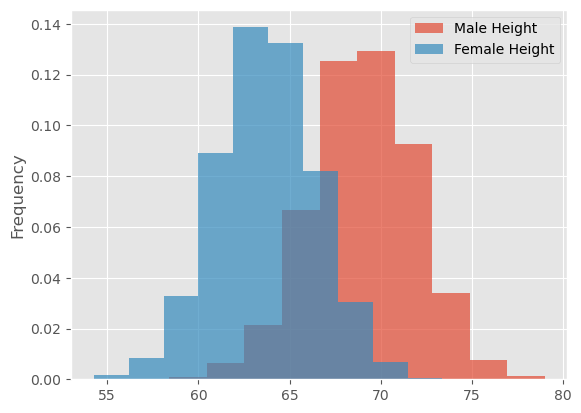

In [85]:
# Your code here
fig, ax = plt.subplots()
ax.hist(male_df.Height, bins=10, alpha=.7, density=1, label="Male Height")
ax.hist(female_df.Height, bins=10, alpha=.7, density=1, label="Female Height")
ax.legend()
ax.set_ylabel("Frequency")

In [87]:
# Record your observations - are these inline with your personal observations?
# These seem like relatively normal distributions, which is expected for height
# additionally, as expected, the male height distribution seems to be generally higher than female

## Create a density function using interpolation


- Write a densit function density() that uses interpolation and takes in a random variable
- Use`np.hist`
- The function should return two lists carrying x and y coordinates for plotting the density function

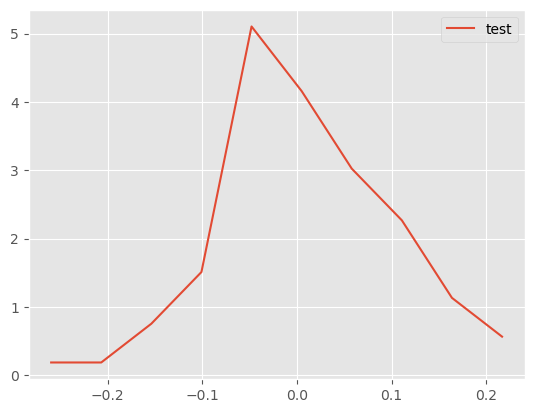

In [90]:
def density(x):
    n, bins = np.histogram(x, 10, density=1)
    pdfx = np.zeros(n.size)
    pdfy = np.zeros(n.size)
    for k in range(n.size):
        pdfx[k] = .5*(bins[k] + bins[k+1])
        pdfy[k] = n[k]
    return pdfx, pdfy


# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend()

## Add Overlapping density plots to the histograms plotted earlier

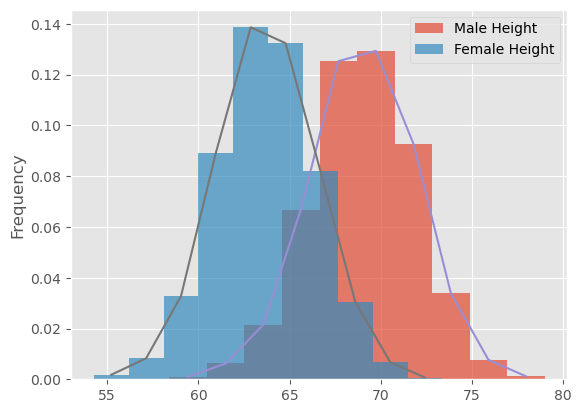

In [99]:
# You code here 
fig, ax = plt.subplots()
ax.hist(male_df.Height, bins=10, alpha=.7, density=1, label="Male Height")
ax.hist(female_df.Height, bins=10, alpha=.7, density=1, label="Female Height")
ax.legend()
ax.set_ylabel("Frequency")

male_x, male_y = density(male_df.Height)
ax.plot(male_x,male_y)
female_x, female_y = density(female_df.Height)
ax.plot(female_x,female_y)

## Repeat above exerice for male and female weights

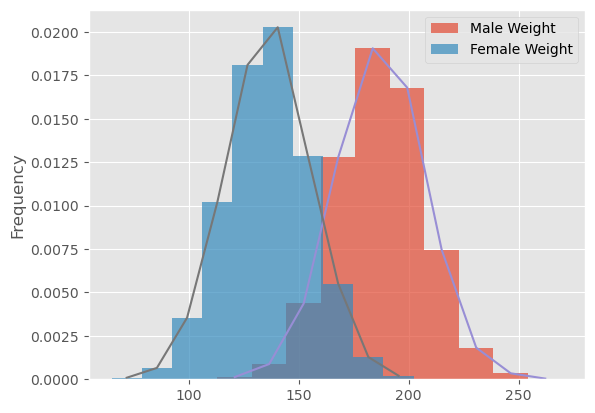

In [101]:
# Your code here 
fig, ax = plt.subplots()
ax.hist(male_df.Weight, bins=10, alpha=.7, density=1, label="Male Weight")
ax.hist(female_df.Weight, bins=10, alpha=.7, density=1, label="Female Weight")
ax.legend()
ax.set_ylabel("Frequency")

male_x, male_y = density(male_df.Weight)
ax.plot(male_x,male_y)
female_x, female_y = density(female_df.Weight)
ax.plot(female_x,female_y)

## Write your observations in the cell below

In [103]:
# Record your observations - are these inline with your personal observations?
# These seem slightly less normally distributed, but still look relatively normal distribution

# What is the takeaway when comparing male and female heights and weights?
# Distribution is similar, male weight is generally higher than female weight

## Repeat Above experiments in seaborn and compare with your results

<Axes: xlabel='Height', ylabel='Density'>

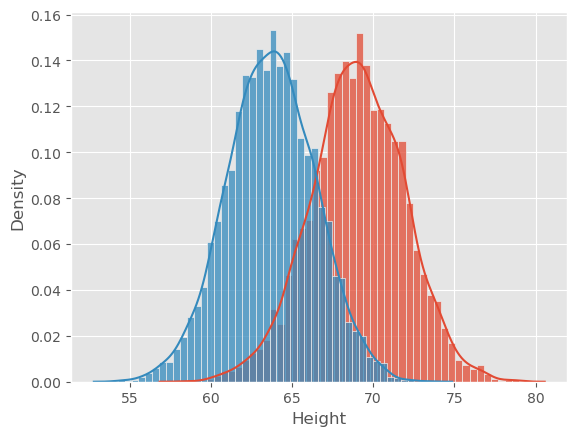

In [115]:
# Code for heights here
import seaborn as sns
sns.kdeplot(male_df.Height)
sns.kdeplot(female_df.Height)
sns.histplot(male_df.Height, stat="density")
sns.histplot(female_df.Height, stat="density")

<Axes: xlabel='Weight', ylabel='Density'>

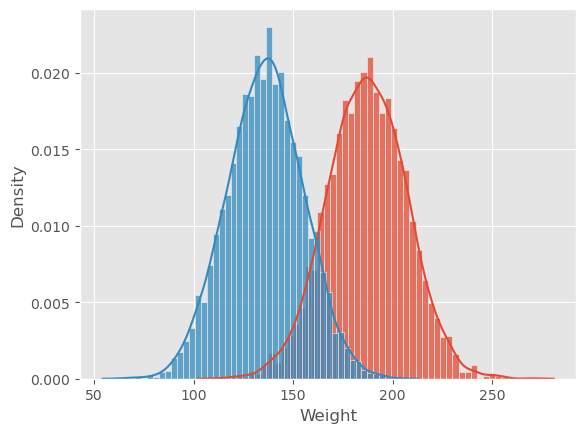

In [117]:
# Code for weights here
sns.kdeplot(male_df.Weight)
sns.kdeplot(female_df.Weight)
sns.histplot(male_df.Weight, stat="density")
sns.histplot(female_df.Weight, stat="density")

In [11]:
# Your comments on the two approaches here. 
# are they similar? what makes them different if they are?
# Seaborn has many more bins, showing the normal distribution much more effectively. 
# The density plots are also much smoother because of the higher number of bins

## Summary

In this lesson you learned how to build the probability density curves visually for a given datasets, and compare the distributions visually by looking at the spread, center and overlap. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.